# Inferential statistics II - Bootstrapping
#### Chuck Tucker Solution

In [2]:
# import packages

import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt

%matplotlib inline

## Medical charge data set

In [4]:
# read the data to a dataframe

med_charges = pd.read_csv('../SB_Files/data/insurance2.csv')
med_charges.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you'll now use bootstrap inference to verify your calculations and check that you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before (mean hospital charge).

__A:__
- Bootstrapping gives a lower limit 95% confidence interval of 12724.467921704005

In [8]:
# set the random seed and resample the data

np.random.seed(47)
N_rep = 10000

bs = pd.DataFrame({'means': 
                   [med_charges.sample(len(med_charges),replace=True).charges.mean() 
                    for i in range(N_rep)]})

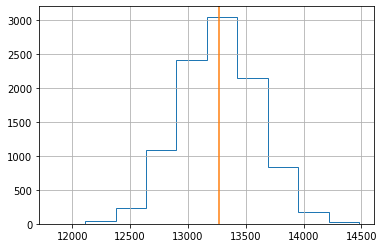

In [9]:
# visualize the bootstrap distribution and the observed mean

bs.means.hist(histtype='step')
plt.axvline(med_charges.charges.mean(), color='C1')

In [11]:
# calculate and print lower 95% confidence interval

print('95% Lower Confidence Interval: ', bs.means.quantile(0.05))

95% Lower Confidence Interval:  12724.467921704005


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember, in the previous mini-projects, we saw that there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap approach!

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

In [13]:
# divide the data

ins = med_charges.query('insuranceclaim == 1')
non = med_charges.query('insuranceclaim == 0')

In [16]:
# define a function to easily create bootstrap samples

def bss(data, func):
    """Create a bootstrap sample from data, using func on the data"""
    
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [21]:
# generate the bootstrap distributions

ins_bs = np.array([bss(ins.charges, np.std) for i in range(10000)])
non_bs = np.array([bss(non.charges, np.std) for i in range(10000)])

In [30]:
# calculate the differences between the std's, and the observed difference

std_diff_dist = ins_bs - non_bs
ins_std = np.std(ins.charges)
non_std = np.std(non.charges)

Text(0, 0.5, 'Probability')

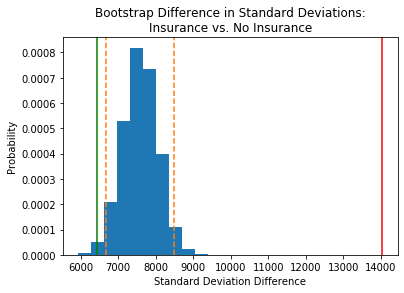

In [31]:
plt.hist(std_diff_dist, density=True)
plt.axvline(np.percentile(std_diff_dist, 2.5), color='C1', linestyle='dashed')
plt.axvline(np.percentile(std_diff_dist, 97.5), color='C1', linestyle='dashed')
plt.axvline(ins_std, color='red')
plt.axvline(non_std, color='green')
plt.title('Bootstrap Difference in Standard Deviations:\nInsurance vs. No Insurance')
plt.xlabel('Standard Deviation Difference')
plt.ylabel('Probability')